# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress

from api_keys import weather_api_key 
from citipy import citipy

In [4]:
output_data_file = "output_data/cities.csv"

In [28]:
#base_url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "imperial"

In [25]:
#city_data = pd.read_csv("../output_data/cities.csv")
#city_data.head()

## Generate Cities List

In [5]:
#setup lists for loop
coordinates = []
city_list = []

#find 500+ cities
lats = np.random.uniform(low=-90.000, high=90.000, size=1300)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1300)
coordinates = zip(lats, lngs)

#loop through citipy
for coordinates in coordinates:
    rand_city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name

    if rand_city not in city_list:
        city_list.append(rand_city)

In [6]:
rand_city

'albany'

In [7]:
len(city_list)

561

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#city_data.columns

In [9]:
city_name= []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [10]:
set_count = 1
record = 0
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" 

print('Beginning Data Retrieval')
print('------------------------')

for city in city_list:
    
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    response = requests.get(query_url).json()
    
    if record < 50:
        record += 1
    else:
        set_count += 1
        record = 1

    print(f"Processing Record {record} of Set {set_count} | {city}")
    
    try:
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
    except:
        print("City not found. Skipping...")
        pass

print('-------------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | killybegs
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | halalo
City not found. Skipping...
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | brokopondo
Processing Record 7 of Set 1 | victoria
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | filingue
Processing Record 10 of Set 1 | seminole
Processing Record 11 of Set 1 | beckley
Processing Record 12 of Set 1 | amderma
City not found. Skipping...
Processing Record 13 of Set 1 | krasnoselkup
Processing Record 14 of Set 1 | zhigansk
Processing Record 15 of Set 1 | guozhen
Processing Record 16 of Set 1 | lavrentiya
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | dingle
Processing Record 20 of Set 1 | pevek
Processing Record 21 of Set 1 | illoqqortoormiut
City not found. Skippin

Processing Record 33 of Set 4 | leh
Processing Record 34 of Set 4 | kodiak
Processing Record 35 of Set 4 | ponta do sol
Processing Record 36 of Set 4 | bathsheba
Processing Record 37 of Set 4 | mahebourg
Processing Record 38 of Set 4 | mojo
Processing Record 39 of Set 4 | manicore
Processing Record 40 of Set 4 | college
Processing Record 41 of Set 4 | presidencia roque saenz pena
Processing Record 42 of Set 4 | zabol
Processing Record 43 of Set 4 | phan rang
City not found. Skipping...
Processing Record 44 of Set 4 | geraldton
Processing Record 45 of Set 4 | diu
Processing Record 46 of Set 4 | rudnya
Processing Record 47 of Set 4 | sompeta
Processing Record 48 of Set 4 | celestun
Processing Record 49 of Set 4 | salinopolis
Processing Record 50 of Set 4 | kibala
Processing Record 1 of Set 5 | matara
Processing Record 2 of Set 5 | saint george
Processing Record 3 of Set 5 | catia la mar
Processing Record 4 of Set 5 | iqaluit
Processing Record 5 of Set 5 | borovoy
Processing Record 6 of S

Processing Record 19 of Set 8 | tuatapere
Processing Record 20 of Set 8 | mitsamiouli
Processing Record 21 of Set 8 | caravelas
Processing Record 22 of Set 8 | azimur
City not found. Skipping...
Processing Record 23 of Set 8 | taywarah
Processing Record 24 of Set 8 | mora
Processing Record 25 of Set 8 | sarangani
Processing Record 26 of Set 8 | dubbo
Processing Record 27 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 28 of Set 8 | bolshegrivskoye
City not found. Skipping...
Processing Record 29 of Set 8 | wang saphung
Processing Record 30 of Set 8 | guhagar
Processing Record 31 of Set 8 | fukue
Processing Record 32 of Set 8 | aberdeen
Processing Record 33 of Set 8 | robertsport
Processing Record 34 of Set 8 | dharchula
Processing Record 35 of Set 8 | kieta
Processing Record 36 of Set 8 | ostrovnoy
Processing Record 37 of Set 8 | saint-joseph
Processing Record 38 of Set 8 | kijang
Processing Record 39 of Set 8 | half moon bay
Processing Record 40 of Set 8 | evensk
P

Processing Record 7 of Set 12 | husavik
Processing Record 8 of Set 12 | ano poroia
Processing Record 9 of Set 12 | narsaq
Processing Record 10 of Set 12 | eskasem
City not found. Skipping...
Processing Record 11 of Set 12 | coihaique
-------------------------
Data Retrieval Complete


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_df = pd.DataFrame({"City": city_name, "Country": country, "Date": date,
                          "Latitude": lat, "Longitude": lng, "Cloudiness": cloudiness,
                          "Humidity": humidity, "Max Temperature": max_temp, "Wind Speed": wind_speed})

weather_df

,City,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed
0,Busselton,AU,1621740615,-33.6500,115.3333,85,70,57.04,17.78
1,Killybegs,IE,1621740615,54.6333,-8.4500,100,91,43.45,21.05
2,Longyearbyen,SJ,1621740616,78.2186,15.6401,20,58,24.64,3.44
3,Mataura,NZ,1621740616,-46.1927,168.8643,3,79,49.48,0.69
4,Distrikt Brokopondo,SR,1621740617,4.7500,-55.1667,96,91,76.53,7.07
...,...,...,...,...,...,...,...,...,...
498,Ust-Maya,RU,1621740836,60.4167,134.5333,74,24,56.34,4.00
499,Husavik,IS,1621740837,66.0449,-17.3389,100,96,40.91,9.86
500,Ano Poroia,GR,1621740837,41.2833,23.0333,70,73,60.24,2.66
501,Narsaq,GL,1621740838,60.9167,-46.0500,100,68,35.82,5.06


In [12]:
weather_df['City'].value_counts()

Praia                    2
Winslow                  1
Kupang                   1
Katherine                1
Rosetown                 1
                        ..
Aksakovo Municipality    1
Tyrma                    1
Lavrentiya               1
Killybegs                1
Chapais                  1
Name: City, Length: 502, dtype: int64

In [13]:
weather_df = weather_df.drop_duplicates(['City'])

In [14]:
weather_df.count()

City               502
Country            502
Date               502
Latitude           502
Longitude          502
Cloudiness         502
Humidity           502
Max Temperature    502
Wind Speed         502
dtype: int64

In [15]:
weather_df.describe()

,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed
count,5.020000e+02,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,1.621741e+09,18.931483,17.212500,56.404382,69.322709,64.718506,7.853446
std,8.934783e+01,33.305192,89.035973,39.503528,21.245815,17.092298,5.431011
min,1.621740e+09,-54.800000,-175.200000,0.000000,7.000000,7.840000,0.000000
25%,1.621741e+09,-8.811625,-58.632550,13.000000,57.000000,51.772500,3.620000
50%,1.621741e+09,19.831500,20.463300,70.500000,73.500000,67.740000,6.910000
75%,1.621741e+09,46.664600,95.913050,96.000000,86.000000,78.645000,10.450000
max,1.621741e+09,78.218600,179.316700,100.000000,100.000000,97.180000,27.810000


In [16]:
weather_df.to_csv("Outputs/weather_df.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
#  Get the indices of cities that have humidity over 100%.
humidity_df = weather_df.loc[weather_df['Humidity'] > 100].index
humidity_df

Int64Index([], dtype='int64')

In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

humid_index_data = weather_df.drop(humidity_df, inplace=False)
humid_index_data.head()

,City,Country,Date,Latitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed
0,Busselton,AU,1621740615,-33.6500,115.3333,85,70,57.04,17.78
1,Killybegs,IE,1621740615,54.6333,-8.4500,100,91,43.45,21.05
2,Longyearbyen,SJ,1621740616,78.2186,15.6401,20,58,24.64,3.44
3,Mataura,NZ,1621740616,-46.1927,168.8643,3,79,49.48,0.69
4,Distrikt Brokopondo,SR,1621740617,4.7500,-55.1667,96,91,76.53,7.07


In [19]:
# Extract relevant fields from the data frame
lats = humid_index_data["Latitude"]
max_temps = humid_index_data["Max Temperature"]
humidity = humid_index_data["Humidity"]
cloudiness = humid_index_data["Cloudiness"]
wind_speed = humid_index_data["Wind Speed"]

# Export the City_Data into a csv
humid_index_data.to_csv("../output_data/cities.csv", index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

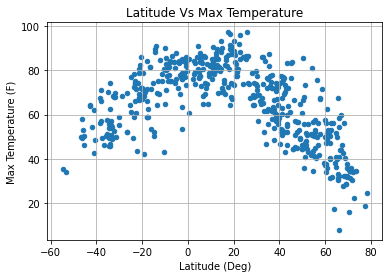

In [21]:
weather_df.plot(kind='scatter', x = 'Latitude', y = 'Max Temperature')
plt.title('Latitude Vs Max Temperature')
plt.xlabel('Latitude (Deg)')
plt.ylabel('Max Temperature (F)')
plt.grid()

## Latitude vs. Humidity Plot

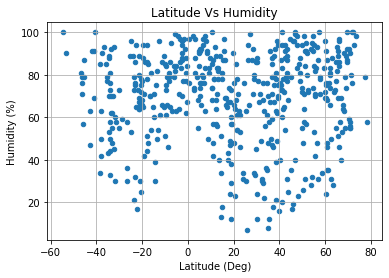

In [22]:
weather_df.plot(kind='scatter', x = 'Latitude', y = 'Humidity')
plt.title('Latitude Vs Humidity')
plt.xlabel('Latitude (Deg)')
plt.ylabel('Humidity (%)')
plt.grid()

## Latitude vs. Cloudiness Plot

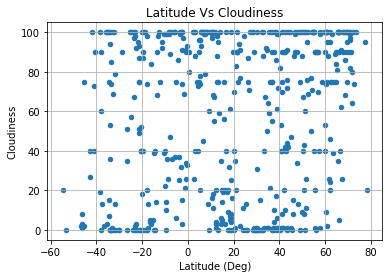

In [63]:
weather_df.plot(kind='scatter', x = 'Latitude', y = 'Cloudiness')
plt.title('Latitude Vs Cloudiness')
plt.xlabel('Latitude (Deg)')
plt.ylabel('Cloudiness')
plt.grid()

## Latitude vs. Wind Speed Plot

## Linear Regression

In [64]:
#create hemisphere dataframes

north_df = weather_df.loc[weather_df['Latitude']>=0]
south_df = weather_df.loc[weather_df['Latitude']<0]

In [170]:
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, r, p, stderr) = linregress(x_val, y_val)

    reg_val = x_val * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

    plt.scatter(x_val, y_val)
    plt.plot(x_val, reg_val)
    plt.annotate(line_eq, text_coordinates, fontsize=15, color= "red")

    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {r**2}")

    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6805760932004241


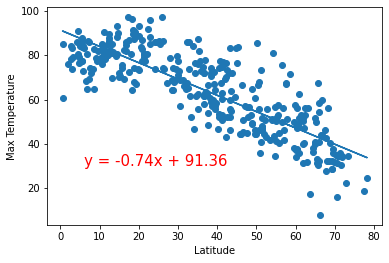

In [171]:
x_val = north_df['Latitude']
y_val = north_df['Max Temperature']

plot_linear_regression(x_val, y_val, 'Max Temperature', (6,30)) 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5085778639778468


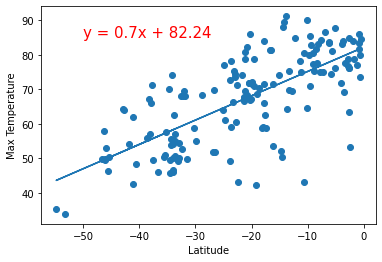

In [158]:
x_val = south_df['Latitude']
y_val = south_df['Max Temperature']

plot_linear_regression(x_val, y_val, 'Max Temperature', (-50,85)) 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0009939746452171474


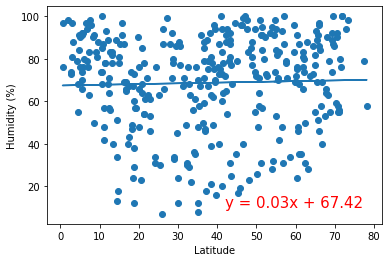

In [159]:
x_val = north_df['Latitude']
y_val = north_df['Humidity']

plot_linear_regression(x_val, y_val, 'Humidity (%)', (42,10)) 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.02387700639600579


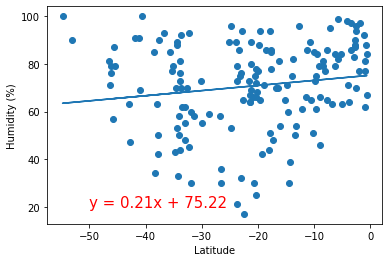

In [160]:
x_val = south_df['Latitude']
y_val = south_df['Humidity']

plot_linear_regression(x_val, y_val, 'Humidity (%)', (-50,20)) 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.029172143603851466


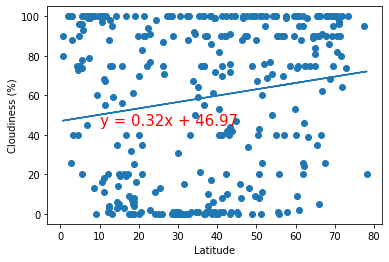

In [165]:
x_val = north_df['Latitude']
y_val = north_df['Cloudiness']

plot_linear_regression(x_val, y_val, 'Cloudiness (%)', (10,45)) 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.04731641947321473


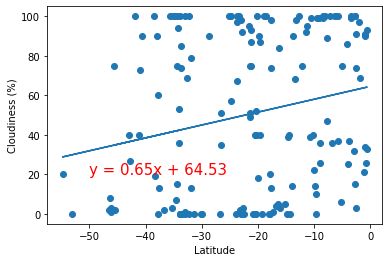

In [161]:
x_val = south_df['Latitude']
y_val = south_df['Cloudiness']

plot_linear_regression(x_val, y_val, 'Cloudiness (%)', (-50,20)) 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0033968027100742355


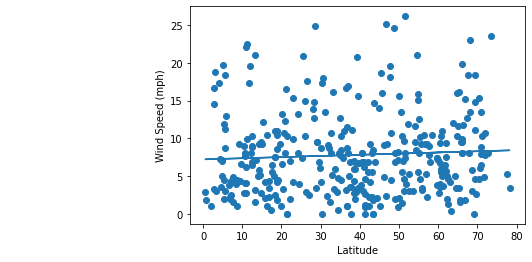

In [166]:
x_val = north_df['Latitude']
y_val = north_df['Wind Speed']

plot_linear_regression(x_val, y_val, 'Wind Speed (mph)', (20, 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.018222947529489802


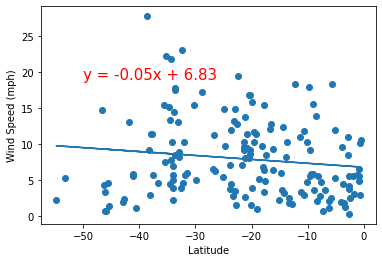

In [169]:
x_val = south_df['Latitude']
y_val = south_df['Wind Speed']

plot_linear_regression(x_val, y_val, 'Wind Speed (mph)', (-50,19)) 